In [2]:
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import sys
# from chimera import Chimera
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle

sns.set(style='ticks', context='notebook', font_scale=1.2)

In [3]:
def gradient_patch(ax, xmin, xmax, ymin, ymax, fill_color='k', alpha=1, zorder=1):
    
    x = np.linspace(xmin, xmax, 100)
    y = np.linspace(ymin, ymax, 100)
    
    z = np.empty((100, 1, 4), dtype=float)
    rgb = mcolors.colorConverter.to_rgb(fill_color)
    z[:,:,:3] = rgb
    z[:,:,-1] = np.linspace(0, alpha, 100)[:,None]

    im = ax.imshow(z, aspect='auto', extent=[xmin, xmax, ymin, ymax],
                   origin='lower', zorder=zorder)

    xy = np.column_stack([x, y])
    xy = np.vstack([[xmin, ymin], xy, [xmax, ymin], [xmin, ymin]])
    clip_path = Rectangle(xy=(xmin, ymin), width=xmax-xmin, height=ymax-ymin, 
                          facecolor='none', edgecolor='none')
    ax.add_patch(clip_path)
    im.set_clip_path(clip_path)

## Process data to get relevant info

## Three 1D plots

## 3D plot

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

def cuboid_data(pos, size=(1,1,1)):
    # code taken from
    # https://stackoverflow.com/a/35978146/4124317
    # suppose axis direction: x: to left; y: to inside; z: to upper
    # get the (left, outside, bottom) point
    o = [a - b / 2 for a, b in zip(pos, size)]
    # get the length, width, and height
    l, w, h = size
    x = [[o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]]]  
    y = [[o[1], o[1], o[1] + w, o[1] + w, o[1]],  
         [o[1], o[1], o[1] + w, o[1] + w, o[1]],  
         [o[1], o[1], o[1], o[1], o[1]],          
         [o[1] + w, o[1] + w, o[1] + w, o[1] + w, o[1] + w]]   
    z = [[o[2], o[2], o[2], o[2], o[2]],                       
         [o[2] + h, o[2] + h, o[2] + h, o[2] + h, o[2] + h],   
         [o[2], o[2], o[2] + h, o[2] + h, o[2]],               
         [o[2], o[2], o[2] + h, o[2] + h, o[2]]]               
    return np.array(x), np.array(y), np.array(z)

# def plotCubeAt(ax=None, pos=(0,0,0), size=(1,1,1)):
#     # Plotting a cube element at position pos
#     if ax !=None:
        

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll

def multicolored_lines():
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    """

    x = np.linspace(0, 4. * np.pi, 100)
    y = np.sin(x)
    fig, ax = plt.subplots()
    lc = colorline(x, y, cmap='hsv')
    plt.colorbar(lc)
    plt.xlim(x.min(), x.max())
    plt.ylim(-1.0, 1.0)
    plt.show()

def colorline(
        x, y, z=None, cmap='copper', norm=plt.Normalize(0.0, 1.0),
        linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    # to check for numerical input -- this is a hack
    if not hasattr(z, "__iter__"):
        z = np.array([z])

    z = np.asarray(z)

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm,
                              linewidth=linewidth, alpha=alpha)

    ax = plt.gca()
    ax.add_collection(lc)

    return lc

def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
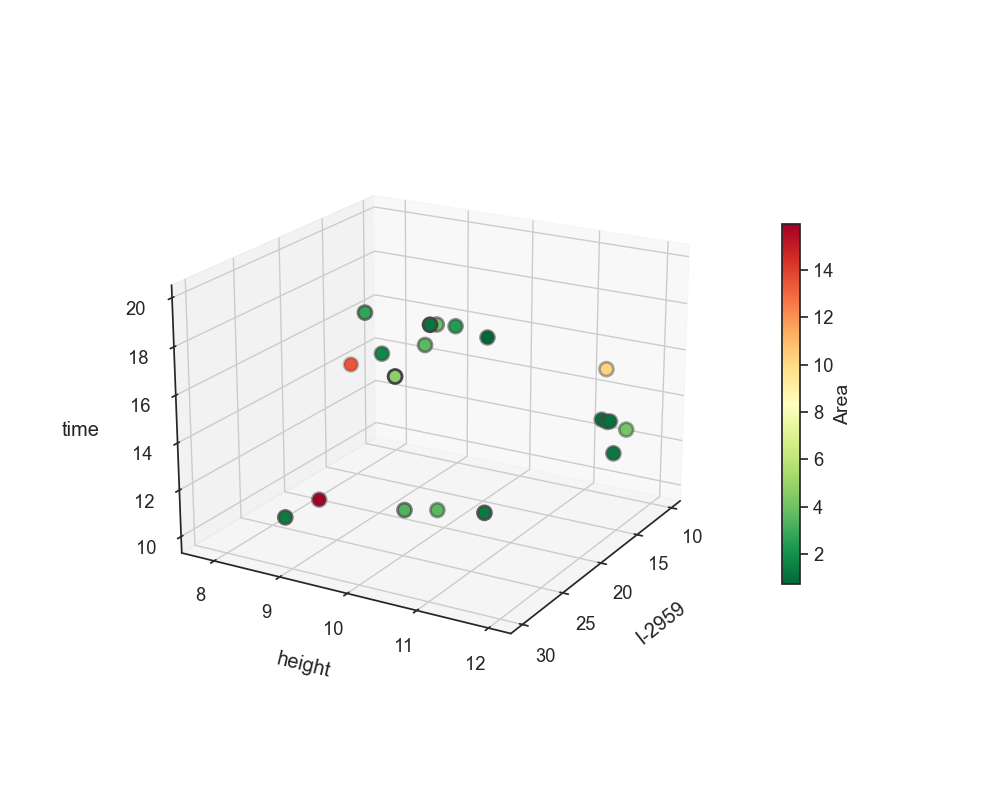

In [6]:
# %%capture test
filenames = []

data = pd.read_csv('20211126.csv', index_col='#')

v1 = data.loc[:20, 'I-2959']
v2 = data.loc[:20, 'height']
v3 = data.loc[:20, 'time']
o = data.loc[:20,'Area']


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
color_map = plt.cm.get_cmap('RdYlGn')
cmap = color_map.reversed()

sc = ax.scatter(v1, v2, v3, s=100, c=o, cmap=cmap, edgecolor='#444444', linewidth=2)

fig.subplots_adjust(left=0.2, right=0.8)
# cbar_ax = fig.add_axes([1.2, 0.3, 0.015, 0.4])  # [left, bottom, width, height]
# colorbar = fig.colorbar(sc, cax=cbar_ax, orientation='vertical')
colorbar = fig.colorbar(sc, orientation='vertical', fraction=0.03, pad=0.2)
_ = colorbar.set_label('Area', fontsize=14, labelpad=0.1)
# _ = colorbar.set_ticks([0, 1])
# _ = colorbar.set_ticklabels([min(o), max(o)])
# _ = cbar_ax.tick_params(labelsize=14) 


# labels
ax.set_xlabel('I-2959', labelpad=10)
ax.set_ylabel('height', labelpad=10)
ax.set_zlabel('time', labelpad=10)

#plt.tight_layout()
ax.view_init(elev=20, azim=30)
ax.dist = 8


# fig.savefig("3d_plot_{}.png".format(i), bbox_inches='tight')
# filenames.append("3d_plot_{}.png".format(i))



## Make GIF

In [8]:
import imageio
images = [imageio.imread(file) for file in filenames]
imageio.mimsave('opt.gif', images, format='GIF', duration=0.25, loop=1)
# for filename in set(filenames):
#     os.remove(filename)

ModuleNotFoundError: No module named 'imageio'

In [16]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 7.30.0
ipykernel        : 6.5.1
ipywidgets       : 7.6.5
jupyter_client   : 7.1.0
jupyter_core     : 4.9.1
jupyter_server   : not installed
jupyterlab       : not installed
nbclient         : 0.5.9
nbconvert        : 6.3.0
nbformat         : 5.1.3
notebook         : 6.4.6
qtconsole        : 5.2.1
traitlets        : 5.1.1
